<a href="https://colab.research.google.com/github/hws2002/ThinkBayes2/blob/main/CH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy
from scipy.stats import binom

n = 2
p = 0.5
k = 1
binom.pmf(k, n, p)

0.5000000000000002

binom.pmf()에 단일값 k 대신 여러 값의 배열을 사용할 수도 있다.

In [2]:
import numpy as np
ks = np.arange(n+1)

ps = binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

In [3]:
!pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.8.0-py3-none-any.whl size=12556 sha256=6f17ae5a0d097cc93287ade432de8bf492061e270c4da2eaf7fd43272fa9c7b4
  Stored in directory: /root/.cache/pip/wheels/ca/a9/1f/90c7a8a37ac37ff0fa0a27b2152f9b24be8910448ab93992f8
Successfully built empiricaldist


In [56]:
from empiricaldist import Pmf

pmf_k = Pmf(ps, ks)
pmf_k

,0
0,0.25
1,0.50
2,0.25


In [57]:
# 주어진 n과 p에 대한 이항분포를 구하여 이를 나타내는 Pmf를 결괏값으로 반환하는 함수
def make_binomial(n, p):
  """ 이항 Pmf를 생성함."""
  ks = np.arange(n+1)
  ps = binom.pmf(ks, n, p)
  return Pmf(ps, ks)

In [58]:
pmf_k = make_binomial(n = 250, p = 0.5)
pmf_k

,0
0,5.527148e-76
1,1.381787e-73
2,1.720325e-71
3,1.422135e-69
4,8.781685e-68
...,...
246,8.781685e-68
247,1.422135e-69
248,1.720325e-71
249,1.381787e-73


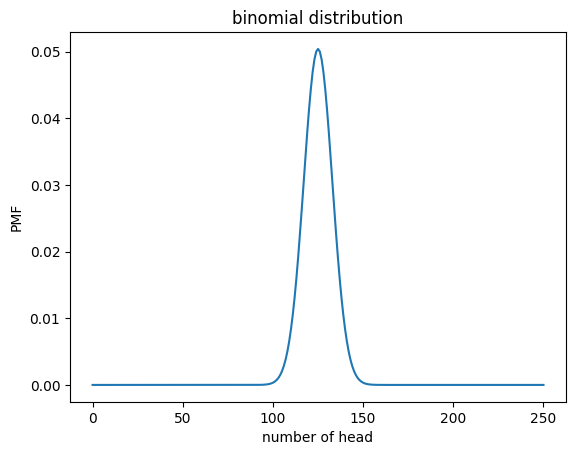

In [59]:
import matplotlib.pyplot as plt
plt.plot(pmf_k)
plt.xlabel("number of head")
plt.ylabel('PMF')
plt.title("binomial distribution")
# plt.legend('n = 250, p = 0.5')
plt.show()

In [60]:
pmf_k.max_prob()

125

In [61]:
pmf_k[125]

0.050412213147309655

In [62]:
pmf_k[140]

0.008357181724918188

In [63]:
# pmf를 취해서 threshold보다 크거나 같은 값이 갖는 전체확률을 구한다
def prob_ge(pmf, threshold):
  """ 임계점보다 크거나 같은 값이 가지는 총 확률"""
  ge = (pmf.qs >= threshold)
  total = pmf[ge].sum()
  return total

In [64]:
# 140개 이상의 앞면이 나올 확률
prob_ge(pmf_k, 140)

0.03321057562002166

In [65]:
pdf_k = pmf_k.cumsum(axis = 0)
pdf_k

,0
0,5.527148e-76
1,1.387314e-73
2,1.734198e-71
3,1.439477e-69
4,8.925632e-68
...,...
246,1.000000e+00
247,1.000000e+00
248,1.000000e+00
249,1.000000e+00


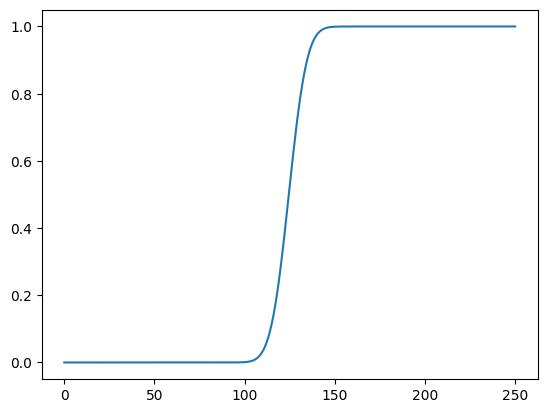

In [66]:
plt.plot(pdf_k)

# 베이지안 추정

x가 동전이 돌렸을때 앞면을 보이며 넘어질 확률이라고 하고,  
x의 모든 값이 동일한 정도로 가능하다고 가정하는 균등분포를 사전분포로 두고 시작해 보자.

In [67]:
hypos = np.linspace(0, 1, 101)
hypos

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [68]:
prior = Pmf(1, hypos)

In [69]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

In [70]:
likelihood = {
    'H' : likelihood_heads,
    'T' : likelihood_tails
}

H를 140번 반복하고 T를 110번 반복해서 문자열을 만들어서 데이터를  표현해 보자

In [71]:
dataset = 'H' * 140 + 'T' * 110
dataset

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT'

In [109]:
def update_euro(pmf, dataset):
  for data in dataset:
    pmf *= likelihood[data]
  pmf.normalize()

In [110]:
posterior = prior.copy()
update_euro(posterior, dataset)
posterior.normalize()

1.0000000000000002

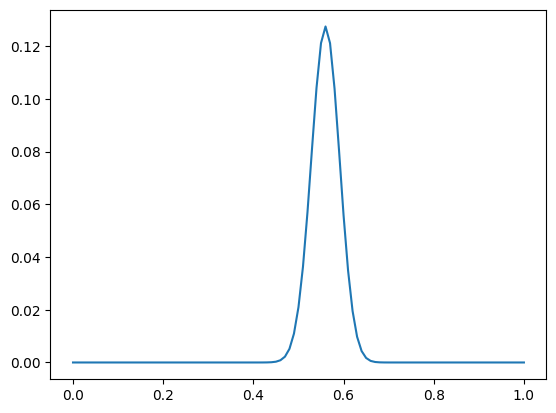

In [111]:
plt.plot(posterior)

In [112]:
posterior.max_prob()

0.56

# 삼각사전분포

앞서 균등사전분포를 다음과 같이 사용했다

In [113]:
hypos = np.linspace(0,1,101)
uniform = Pmf(1, hypos, name = "uniform")
uniform.normalize()

101

하지만 우리가 알고 있는 동전의 지식을 생각해보면 이는 그다지 합리적인 선택지는 아니다.  
x가 0.5에 가까울수록 높고 극단적인 값으로 갈수록 낮은 확률을 갖는 사전분포를 선택하는 게 보다 합리적이다.  
한 예로 삼각형 형태의 사전확률을 고려해 볼 수 있다.  

In [114]:
ramp_up = np.arange(50) # 0~49
ramp_down = np.arange(50, -1 ,-1) # 50 ~ 0

a = np.append(ramp_up, ramp_down)

triangle = Pmf(a, hypos, name = 'triangle')
triangle.normalize()
triangle

,triangle
0.00,0.0000
0.01,0.0004
0.02,0.0008
0.03,0.0012
0.04,0.0016
...,...
0.96,0.0016
0.97,0.0012
0.98,0.0008
0.99,0.0004


Text(0.5, 0, "x (where P is the 'actual' probability that coin yields head)")

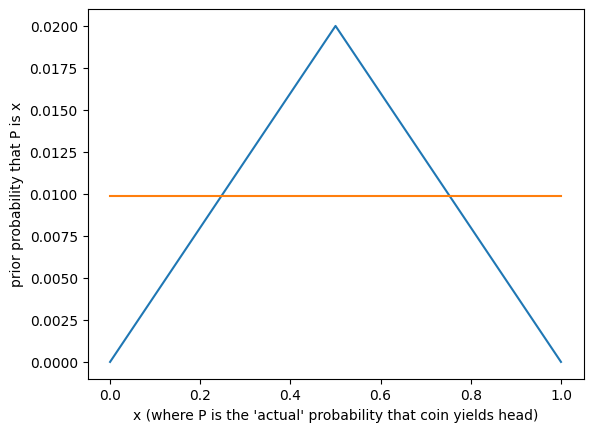

In [115]:
plt.plot(triangle)
plt.plot(uniform)
plt.ylabel("prior probability that P is x")
plt.xlabel("x (where P is the 'actual' probability that coin yields head)")

In [116]:
update_euro(triangle, dataset)
update_euro(uniform, dataset)

In [117]:
triangle.max_prob()

0.56

# 4.5 이항가능도 함수

In [118]:
from scipy.stats import binom

def update_binomial(pmf, data):
  """ 이항분포를 사용해서 pmf를 갱신"""
  k, n = data
  xs = pmf.qs
  likelihood = binom.pmf(k, n, xs)
  pmf *= likelihood
  pmf.normalize()

In [119]:
uniform2 = Pmf(1, hypos, name = "uniform2")
data = 140, 250
update_binomial(uniform2, data)

In [120]:
np.allclose(uniform, uniform2)

True

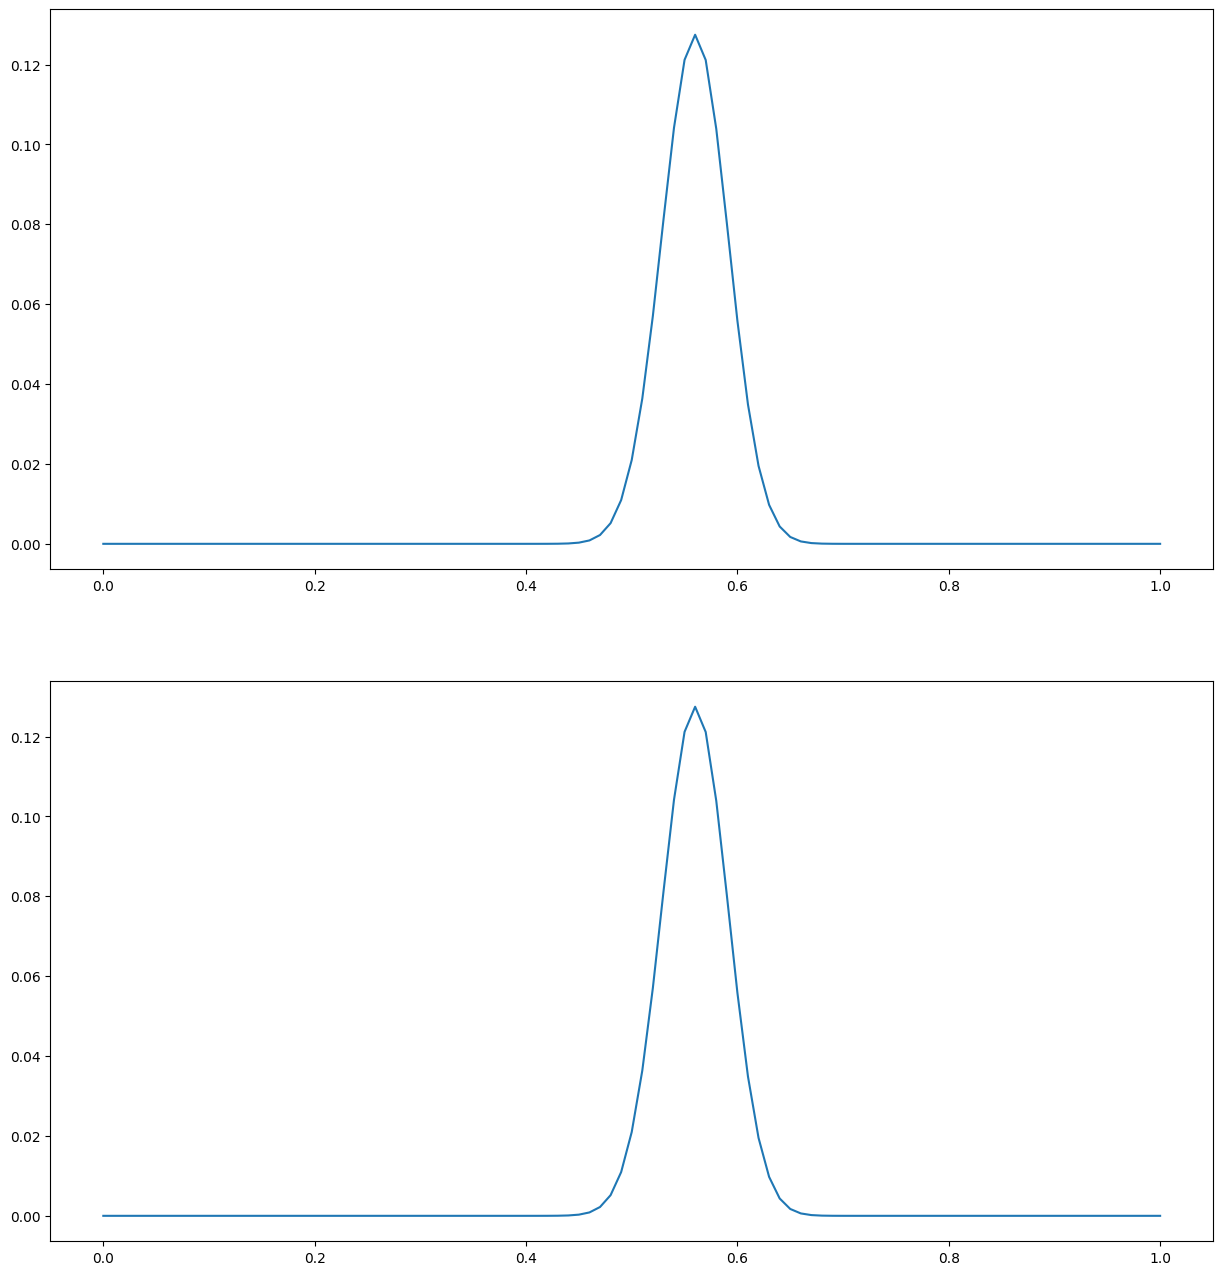

In [121]:
fig, ax = plt.subplots(2,1, figsize = (15,16))

ax[0].plot(uniform)
ax[1].plot(uniform2)
plt.show()

# 4.8 연습문제

## 문제 4-1

### 1) 사전확률을 균등분포로 가정했을 때

In [134]:
hypos = np.linspace(.200, .330, 131)
prior = Pmf(1, hypos, name = "uniform")
prior.normalize()
uniform = prior.copy()
data = 3, 3
update_binomial(uniform, data)

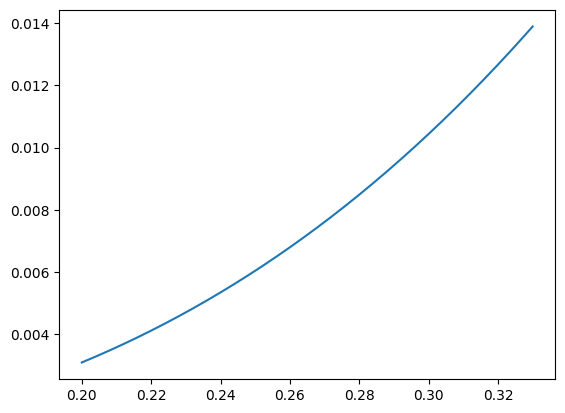

In [135]:
plt.plot(uniform)

In [133]:
uniform.max_prob()

0.33

### 2) 사전확률을 타율이 높을 확률이 더 낮게 설정했을 때

In [137]:
hypos = np.linspace(.200, .330, 131)
ramp_down = np.arange(130, -1, -1) # 130 ~ 0
prior = Pmf(ramp_down, hypos, name = "skewed")
prior.normalize()
skewed = prior.copy()
data = 3, 3
update_binomial(skewed, data)

사전 확률을 다음과 같이 설정한 것이다.

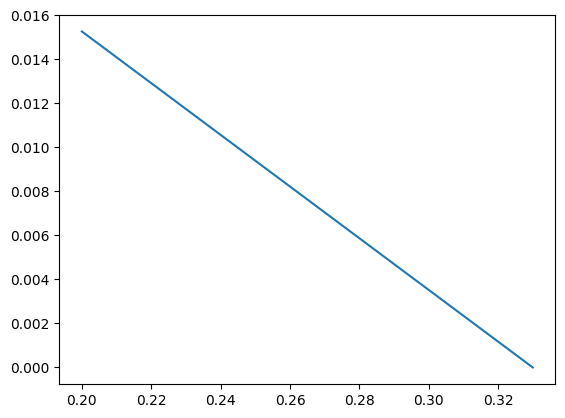

In [140]:
plt.plot(prior)

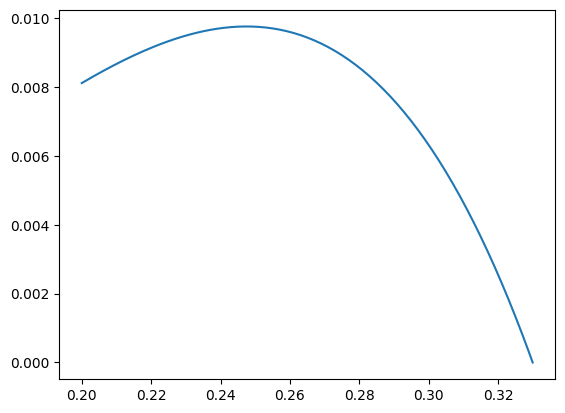

In [138]:
plt.plot(skewed)

In [142]:
skewed.max_prob()

0.247

사전확률이 제일 높은 타율은 0.247이다.

### 3) 사전확률을 normal distribution으로 가정했을 때

0.265

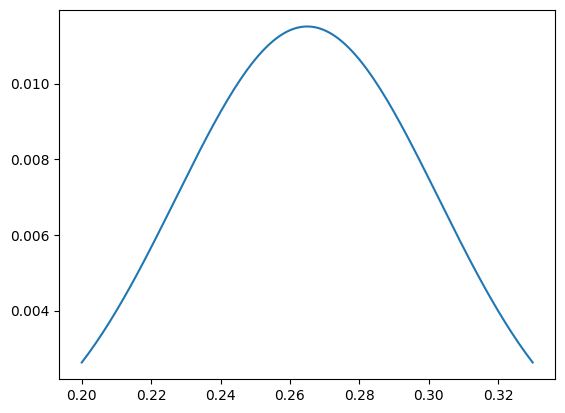

In [171]:
from scipy.stats import norm

x = np.linspace(.2, .33, 131)
mean = np.mean(x)
std = np.std(x)

normal_dist = norm.pdf(x, mean,std)
prior = Pmf(normal_dist, index = x, name = "gaussian")
prior.normalize()
plt.plot(prior)
prior.max_prob()

0.28

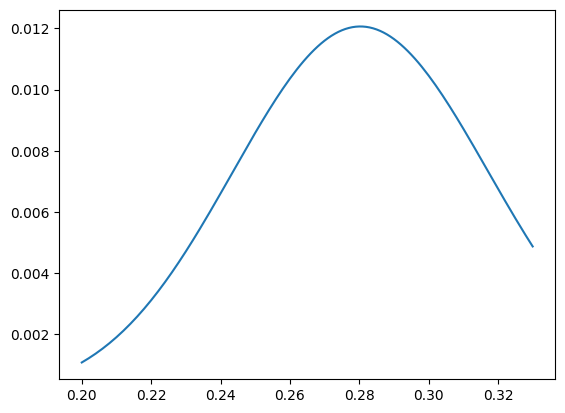

In [166]:
normal = prior.copy()
update_binomial(normal, data)
plt.plot(normal)
normal.max_prob()

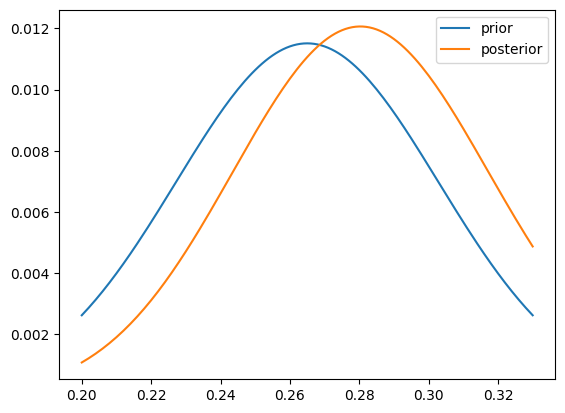

In [168]:
plt.plot(prior, label = "prior")
plt.plot(normal, label = "posterior")
plt.legend()
plt.show()

## 문제 4-2

### 1) 균등분포 가정

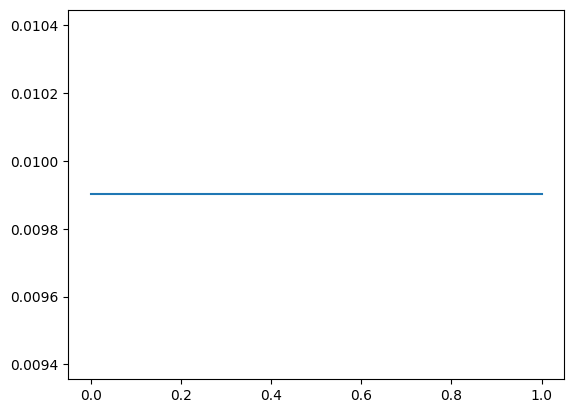

In [198]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos, name = "uniform")
prior.normalize()
plt.plot(prior)

In [199]:
def update_binomial(pmf, data):
  k, n = data
  xs = pmf.qs
  likelihood = binom.pmf(k, n, (1+xs)/2)
  pmf *= likelihood
  pmf.normalize()

0.6

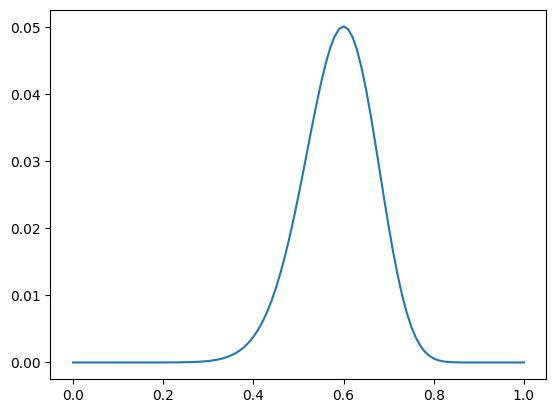

In [202]:
data = 80, 100
uniform = prior.copy()
update_binomial(uniform, data)
plt.plot(uniform)
uniform.max_prob()

## 문제 4-3

### 1) 사전확률이 균등분포

In [207]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos, name = "uniform")
prior.normalize()

101

In [208]:
def update_binomial(pmf, data):
  k, n = data
  xs = pmf.qs
  likelihood = binom.pmf(k, n, 0.2 + 0.6*xs)
  pmf *= likelihood
  pmf.normalize()

0.6

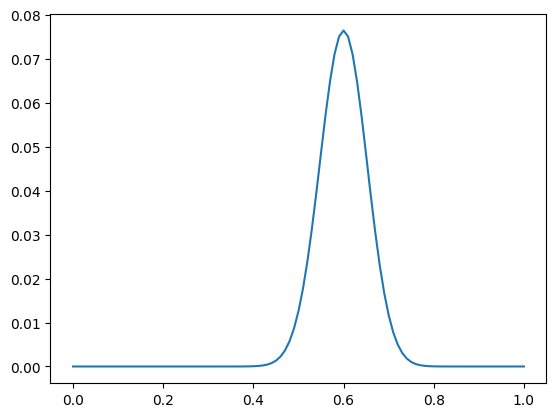

In [209]:
data = 140, 250
uniform = prior.copy()
update_binomial(uniform,data)
plt.plot(uniform)
uniform.max_prob()

### 1-1) 사전확률이 균등분포이고, y 가 0~ 0.5일때

In [234]:
import pandas as pd
ys = np.linspace(0, 0.5, 6)

posteriors = pd.DataFrame( index = ys)
posteriors

""
0.0
0.1
0.2
0.3
0.4
0.5


In [235]:
def update_binomial_y(pmf, data, ys):
  k, n = data
  xs = pmf.qs
  ret = []
  for y in ys :
    pmf_ = pmf.copy()
    likelihood = binom.pmf(k, n, xs * (1-y) + (1-xs) * y)
    pmf_ *= likelihood
    pmf_.normalize()
    ret.append(pmf_)
  return ret

In [236]:
uniform = prior.copy()
posteriors_values = update_binomial_y(uniform, data, ys)
posteriors_max_prob = []
for pv in posteriors_values:
  posteriors_max_prob.append(pv.max_prob())
posteriors_max_prob

[0.56, 0.5700000000000001, 0.6, 0.65, 0.8, 0.0]

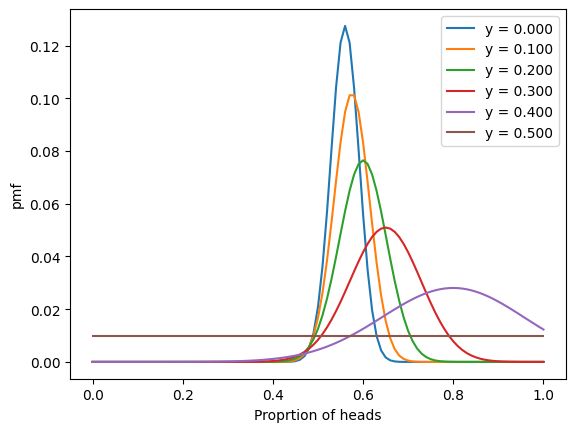

In [242]:
for i, pv in enumerate(posteriors_values):
  plt.plot(pv, label = f"y = {ys[i]:.3f}")
plt.legend()
plt.xlabel('Proprtion of heads')
plt.ylabel('pmf')
plt.show()

In [237]:
posteriors['posterior_max'] = posteriors_max_prob
posteriors

,posterior_max
0.0,0.56
0.1,0.57
0.2,0.60
0.3,0.65
0.4,0.80
0.5,0.00


### 2) 사전확률이 삼각사전분포이고, y가 0 ~0.5일때

In [245]:
ramp_up = np.arange(50) # 0~49
ramp_down = np.arange(50, -1 ,-1) # 50 ~ 0

a = np.append(ramp_up, ramp_down)

triangle = Pmf(a, hypos, name = 'triangle')
triangle.normalize()
triangle

,triangle
0.00,0.0000
0.01,0.0004
0.02,0.0008
0.03,0.0012
0.04,0.0016
...,...
0.96,0.0016
0.97,0.0012
0.98,0.0008
0.99,0.0004


In [246]:
ys = np.linspace(0, 0.5, 6)
posteriors = pd.DataFrame( index = ys)
posteriors

""
0.0
0.1
0.2
0.3
0.4
0.5


In [251]:
posterior = triangle.copy()
posteriors_values = update_binomial_y(posterior, data, ys)
posteriors_max_prob = []
for pv in posteriors_values:
  posteriors_max_prob.append(pv.max_prob())
posteriors['posterior_max'] = posteriors_max_prob
posteriors

,posterior_max
0.0,0.56
0.1,0.57
0.2,0.59
0.3,0.63
0.4,0.71
0.5,0.50


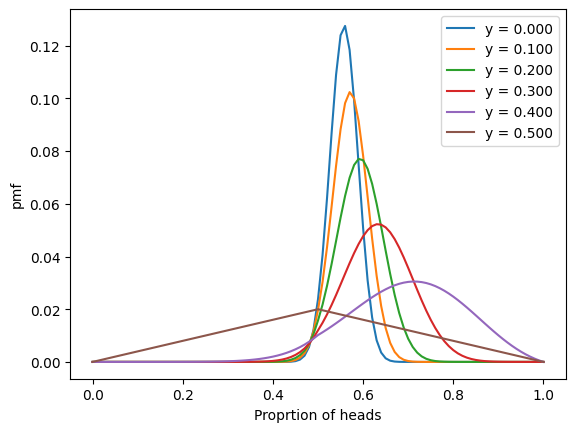

,posterior_max
0.0,0.56
0.1,0.57
0.2,0.59
0.3,0.63
0.4,0.71
0.5,0.50


In [250]:
for i, pv in enumerate(posteriors_values):
  plt.plot(pv, label = f"y = {ys[i]:.3f}")
plt.legend()
plt.xlabel('Proprtion of heads')
plt.ylabel('pmf')
plt.show()
posteriors

## 문제 4-4

In [254]:
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)
prior.normalize()

101

In [258]:
def update_binomial(pmf):
  xs = pmf.qs
  likelihood = (1-xs) ** 4 + (2*xs*(1-xs))**2 + (xs) ** 4
  pmf *= likelihood
  pmf.normalize()

0.1

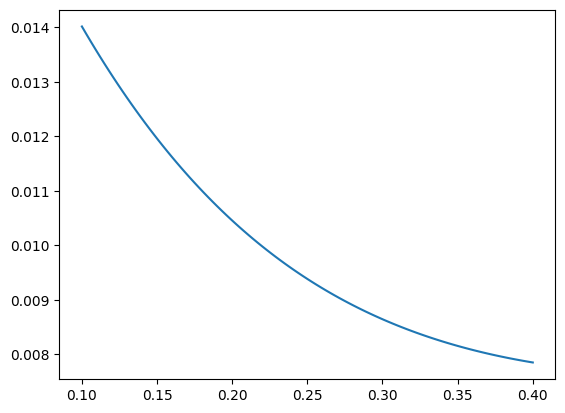

In [259]:
uniform = prior.copy()
update_binomial(uniform)
plt.plot(uniform)
uniform.max_prob()